In [1]:
# Configure how Matplotlib displays plots in Jupyter Notebooks.
# Note: Using both `%matplotlib notebook` and `%matplotlib inline` together can cause conflicts.
# `%matplotlib notebook` enables interactive plots with zoom and pan functionality.
%matplotlib notebook      

# `%matplotlib inline` displays static plots within the notebook. 
# Uncomment only one of the two above based on your needs.
%matplotlib inline         

# Import NumPy for numerical operations, especially efficient array handling.
import numpy as np

# Import Matplotlib's pyplot module for plotting data.
import matplotlib.pyplot as plt

# Import the MoviePy library, typically used for video editing and processing.
import moviepy

import numpy as np
import matplotlib.pyplot as plt

Solving differential equation with Euler

In [2]:
# --- A320 Constants ---
T = 240_000        # Constant thrust (N) provided by the aircraft engines
m = 68_000         # Mass of the aircraft (kg)
k = 2.3            # Drag coefficient (N·s²/m²), used in a quadratic drag model
v0 = 0             # Initial velocity of the aircraft (m/s)
v_takeoff = 75     # Typical takeoff velocity (m/s), not used in this script directly

# --- Time Setup ---
dt = 0.1           # Time step for numerical integration (s)
t_max = 25         # Maximum simulation time (s)
N = int(t_max / dt) + 1  # Total number of time steps
t_ph = np.linspace(0, t_max, N)  # Time vector from 0 to t_max, with N points

# --- Initialize Arrays ---
v_ph = np.zeros(N)           # Velocity array over time (m/s)
a_ph = np.zeros(N)           # Acceleration array over time (m/s²)
x_ph = np.zeros(N)           # Position array over time (m)
drag_ph = np.zeros(N)        # Drag force array over time (N)
thrust_ph = np.full(N, T)    # Thrust force array, constant across time (N)

# Set initial conditions
v_ph[0] = v0                 # Initial velocity
x_ph[0] = 0                  # Initial position

# --- Euler Integration ---
# Perform numerical integration using the forward Euler method to simulate motion
for n in range(N - 1):
    drag_ph[n] = k * v_ph[n]**2                 # Calculate quadratic drag force at time step n
    a_ph[n] = (T - drag_ph[n]) / m              # Newton's second law: acceleration = net force / mass
    v_ph[n + 1] = v_ph[n] + a_ph[n] * dt        # Update velocity using Euler integration
    x_ph[n + 1] = x_ph[n] + v_ph[n] * dt        # Update position using Euler integration

# Compute drag and acceleration at the last time step
drag_ph[-1] = k * v_ph[-1]**2
a_ph[-1] = (T - drag_ph[-1]) / m

# --- Ideal Velocity ---
# Compute the theoretical velocity assuming no drag (idealized case)
v_nodrag = (T / m) * t_ph    # Constant acceleration model: v = a * t

Creating figures to evaluate results

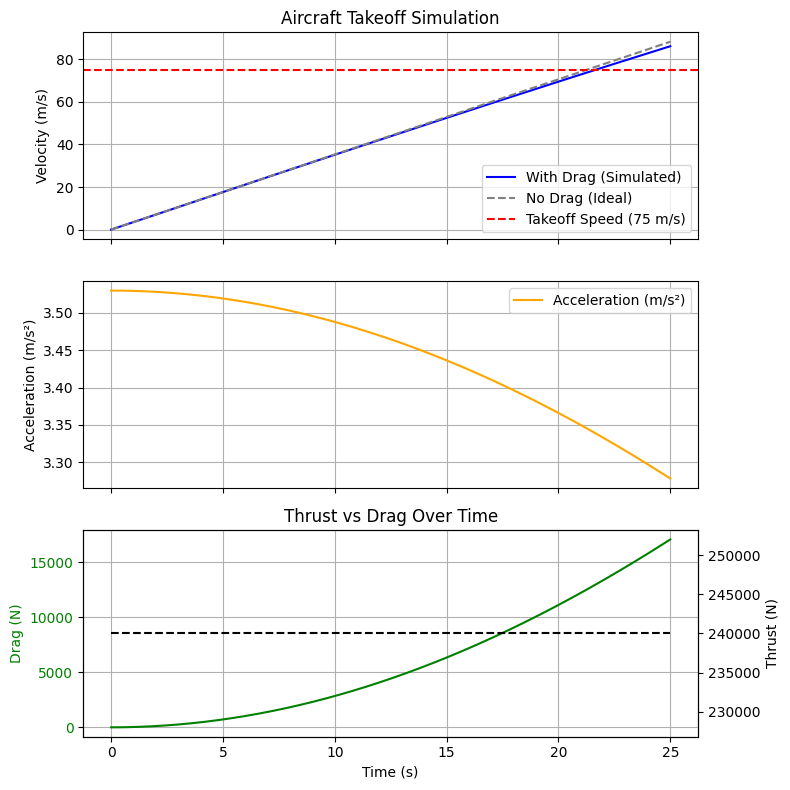

In [3]:
# --- Create Combined Plot with 3 Subplots ---
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)  # Create 3 vertically stacked subplots with shared x-axis
fig.subplots_adjust(hspace=0.4)                            # Adjust vertical spacing between subplots

# --- Subplot 1: Velocity over Time ---
axs[0].plot(t_ph, v_ph, label='With Drag (Simulated)', color='blue')          # Plot velocity from simulation
axs[0].plot(t_ph, v_nodrag, label='No Drag (Ideal)', color='gray', linestyle='--')  # Plot ideal velocity (no drag)
axs[0].axhline(v_takeoff, color='red', linestyle='--', label='Takeoff Speed (75 m/s)')  # Horizontal line for takeoff speed
axs[0].set_ylabel('Velocity (m/s)')                       # Label y-axis
axs[0].set_title('Aircraft Takeoff Simulation')           # Title for the first subplot
axs[0].grid(True)                                         # Enable grid
axs[0].legend(loc='lower right')                          # Display legend

# --- Subplot 2: Acceleration over Time ---
axs[1].plot(t_ph, a_ph, label='Acceleration (m/s²)', color='orange')  # Plot acceleration profile
axs[1].set_ylabel('Acceleration (m/s²)')                              # Label y-axis
axs[1].grid(True)                                                     # Enable grid
axs[1].legend(loc='upper right')                                      # Display legend

# --- Subplot 3: Drag vs. Thrust using Twin Axes ---
ax3 = axs[2]                     # Primary axis for drag
ax3b = ax3.twinx()               # Secondary y-axis sharing same x-axis for thrust

# Plot Drag on left y-axis
ax3.plot(t_ph, drag_ph, label='Drag (N)', color='green')       # Plot drag force over time
ax3.set_ylabel('Drag (N)', color='green')                      # Label y-axis for drag
ax3.tick_params(axis='y', labelcolor='green')                  # Color y-axis ticks to match drag line

# Plot Thrust on right y-axis
ax3b.plot(t_ph, thrust_ph, label='Thrust (N)', color='black', linestyle='--')  # Plot constant thrust
ax3b.set_ylabel('Thrust (N)', color='black')                    # Label y-axis for thrust
ax3b.tick_params(axis='y', labelcolor='black')                  # Color y-axis ticks to match thrust line

# Set common x-axis label and subplot title
axs[2].set_xlabel('Time (s)')                                   # Label x-axis
ax3.set_title('Thrust vs Drag Over Time')                       # Title for the third subplot
ax3.grid(True)                                                  # Enable grid on base axis

# Optimize layout to avoid overlaps
plt.tight_layout()
plt.show()  # Render the plot